# Data Aggregation and Group Operations

In [106]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [107]:
pd.options.display.notebook_repr_html = False

In [108]:
%matplotlib inline

## GroupBy mechanics

In [109]:
df = DataFrame({
    'key1' : ['a', 'a', 'b', 'b', 'a'],
    'key2' : ['one', 'two', 'one', 'two', 'one'],
    'data1' : np.random.randn(5),
    'data2' : np.random.randn(5)
})
df

  key1 key2     data1     data2
0    a  one -0.204708  1.393406
1    a  two  0.478943  0.092908
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023
4    a  one  1.965781  1.246435

In [110]:
grouped = df['data1'].groupby(df['key1'])
grouped  # NB! GroupBy object with intermediate values

In [111]:
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [112]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [113]:
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [114]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.478943
            2006   -0.519439
Ohio        2005   -0.380219
            2006    1.965781
Name: data1, dtype: float64

In [115]:
df.groupby('key1').mean()

         data1     data2
key1                    
a     0.746672  0.910916
b    -0.537585  0.525384

In [116]:
df.groupby(['key1', 'key2']).mean()

              data1     data2
key1 key2                    
a    one   0.880536  1.319920
     two   0.478943  0.092908
b    one  -0.519439  0.281746
     two  -0.555730  0.769023

In [117]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating over groups

In [118]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.204708  1.393406
1    a  two  0.478943  0.092908
4    a  one  1.965781  1.246435
b
  key1 key2     data1     data2
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023


In [119]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.204708  1.393406
4    a  one  1.965781  1.246435
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.478943  0.092908
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.519439  0.281746
('b', 'two')
  key1 key2    data1     data2
3    b  two -0.55573  0.769023


In [120]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

  key1 key2     data1     data2
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023

In [121]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [122]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -0.204708  1.393406
 1  0.478943  0.092908
 2 -0.519439  0.281746
 3 -0.555730  0.769023
 4  1.965781  1.246435,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

In [123]:
df.groupby(['key1', 'key2'])[['data2']].mean()

              data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [124]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

In [125]:
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with dicts and Series

In [126]:
people = DataFrame(
    np.random.randn(5, 5),
    columns=['a', 'b', 'c', 'd', 'e'],
    index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
)
people.loc[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [127]:
mapping = {
    'a': 'red', 'b': 'red', 'c': 'blue',
    'd': 'blue', 'e': 'red', 'f' : 'orange'
}

In [128]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

            blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [129]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [130]:
people.groupby(map_series, axis=1).count()

        blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

### Grouping with functions

In [131]:
# Group by len of name? for example.
# Func apply for every cell
people.groupby(len).sum()

          a         b         c         d         e
3  0.591569 -0.993608  0.798764 -0.791374  2.119639
5  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [132]:
# It's acceptable to use func, list, dict, Series in same time
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

              a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

### Grouping by index levels

In [133]:
columns = pd.MultiIndex.from_arrays(
    [
        ['US', 'US', 'US', 'JP', 'JP'],
        [1, 3, 5, 1, 3]
    ],
    names=['cty', 'tenor']
)
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.560145 -1.265934  0.119827 -1.063512  0.332883
1     -2.359419 -0.199543 -1.541996 -0.970736 -1.307030
2      0.286350  0.377984 -0.753887  0.331286  1.349742
3      0.069877  0.246674 -0.011862  1.004812  1.327195

In [134]:
hier_df.groupby(level='cty', axis=1).count()

cty  JP  US
0     2   3
1     2   3
2     2   3
3     2   3

## Data aggregation

In [135]:
df

  key1 key2     data1     data2
0    a  one -0.204708  1.393406
1    a  two  0.478943  0.092908
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023
4    a  one  1.965781  1.246435

In [136]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [137]:
# Custom aggregate function
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

         data1     data2
key1                    
a     2.170488  1.300498
b     0.036292  0.487276

In [138]:
grouped.describe()

     data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.746672  1.109736 -0.204708  0.137118  0.478943  1.222362   
b      2.0 -0.537585  0.025662 -0.555730 -0.546657 -0.537585 -0.528512   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.965781   3.0  0.910916  0.712217  0.092908  0.669671  1.246435   
b    -0.519439   2.0  0.525384  0.344556  0.281746  0.403565  0.525384   

                          
           75%       max  
key1                      
a     1.319920  1.393406  
b     0.647203  0.769023  

In [139]:
tips = pd.read_csv('data/visual/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
5       25.29  4.71    Male     No  Sun  Dinner     4  0.186240

### Column-wise and multiple function application

In [140]:
grouped = tips.groupby(['sex', 'smoker'])

In [141]:
# NB! Name of function can passed like string
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')
# grouped_pct.agg(np.mean)

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [142]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [143]:
# Custom name of columns instead func name
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

                    foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [144]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

<ipython-input-144-e5c9b67a0c1c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [145]:
result['tip_pct']

               count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [146]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-146-059d91aa9a76>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [147]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [148]:
grouped.agg({
    'tip_pct' : ['min', 'max', 'mean', 'std'],
    'size' : 'sum'
})

                tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### Returning aggregated data in "unindexed" form

In [149]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

      sex smoker  total_bill       tip      size   tip_pct
0  Female     No   18.105185  2.773519  2.592593  0.156921
1  Female    Yes   17.977879  2.931515  2.242424  0.182150
2    Male     No   19.791237  3.113402  2.711340  0.160669
3    Male    Yes   22.284500  3.051167  2.500000  0.152771

## Group-wise operations and transformations

In [150]:
df

  key1 key2     data1     data2
0    a  one -0.204708  1.393406
1    a  two  0.478943  0.092908
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023
4    a  one  1.965781  1.246435

In [151]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

      mean_data1  mean_data2
key1                        
a       0.746672    0.910916
b      -0.537585    0.525384

In [152]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

  key1 key2     data1     data2  mean_data1  mean_data2
0    a  one -0.204708  1.393406    0.746672    0.910916
1    a  two  0.478943  0.092908    0.746672    0.910916
4    a  one  1.965781  1.246435    0.746672    0.910916
2    b  one -0.519439  0.281746   -0.537585    0.525384
3    b  two -0.555730  0.769023   -0.537585    0.525384

In [153]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

            a         b         c         d         e
one -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
two  0.505275 -0.849512  0.075965  0.834983  0.452620

In [154]:
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Steve   0.505275 -0.849512  0.075965  0.834983  0.452620
Wes    -0.082032 -1.063687 -1.047620 -0.884358 -0.028309
Jim     0.505275 -0.849512  0.075965  0.834983  0.452620
Travis -0.082032 -1.063687 -1.047620 -0.884358 -0.028309

In [155]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

               a         b         c         d         e
Joe     1.089221 -0.232534  1.322612  1.113271  1.381226
Steve   0.381154 -1.152125 -0.447807  0.834043 -0.891190
Wes    -0.457709       NaN       NaN -0.136869 -0.548778
Jim    -0.381154  1.152125  0.447807 -0.834043  0.891190
Travis -0.631512  0.232534 -1.322612 -0.976402 -0.832448

In [156]:
demeaned.groupby(key).mean()

                a             b    c             d    e
one  0.000000e+00 -1.110223e-16  0.0  7.401487e-17  0.0
two -2.775558e-17  0.000000e+00  0.0  0.000000e+00  0.0

### Apply: General split-apply-combine

In [157]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

     total_bill   tip     sex smoker  day    time  size   tip_pct
109       14.31  4.00  Female    Yes  Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes  Sun  Dinner     4  0.280535
232       11.61  3.39    Male     No  Sat  Dinner     2  0.291990
67         3.07  1.00  Female    Yes  Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes  Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes  Sun  Dinner     2  0.710345

In [158]:
tips.groupby('smoker').apply(top)

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [159]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

                 total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  

In [160]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

        count      mean       std       min       25%       50%       75%  \
smoker                                                                      
No      151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   
Yes      93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   

             max  
smoker            
No      0.291990  
Yes     0.710345  

In [161]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [162]:
# Suppressing the group keys
tips.groupby('smoker', group_keys=False).apply(top)

     total_bill   tip     sex smoker   day    time  size   tip_pct
88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

### Quantile and bucket analysis

In [163]:
# Put to "box" with same length
frame = DataFrame({
    'data1': np.random.randn(1000),
    'data2': np.random.randn(1000)
})
factor = pd.cut(frame.data1, 4)
factor[:10]

0     (-1.23, 0.489]
1    (-2.956, -1.23]
2     (-1.23, 0.489]
3     (0.489, 2.208]
4     (-1.23, 0.489]
5     (0.489, 2.208]
6     (-1.23, 0.489]
7     (-1.23, 0.489]
8     (0.489, 2.208]
9     (0.489, 2.208]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.956, -1.23] < (-1.23, 0.489] < (0.489, 2.208] < (2.208, 3.928]]

In [164]:
def get_stats(group):
    return {
        'min': group.min(), 'max': group.max(),
        'count': group.count(), 'mean': group.mean()
    }

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

                      min       max  count      mean
data1                                               
(-2.956, -1.23] -3.399312  1.670835   95.0 -0.039521
(-1.23, 0.489]  -2.989741  3.260383  598.0 -0.002051
(0.489, 2.208]  -3.745356  2.954439  297.0  0.081822
(2.208, 3.928]  -1.929776  1.765640   10.0  0.024750

In [165]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

            min       max  count      mean
data1                                     
0     -3.399312  1.670835  100.0 -0.049902
1     -1.950098  2.628441  100.0  0.030989
2     -2.925113  2.527939  100.0 -0.067179
3     -2.315555  3.260383  100.0  0.065713
4     -2.047939  2.074345  100.0 -0.111653
5     -2.989741  2.184810  100.0  0.052130
6     -2.223506  2.458842  100.0 -0.021489
7     -3.056990  2.954439  100.0 -0.026459
8     -3.745356  2.735527  100.0  0.103406
9     -2.064111  2.377020  100.0  0.220122

### Example: Filling missing values with group-specific values

In [166]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.125921
2         NaN
3   -0.884475
4         NaN
5    0.227290
dtype: float64

In [167]:
s.fillna(s.mean())

0   -0.261035
1   -0.125921
2   -0.261035
3   -0.884475
4   -0.261035
5    0.227290
dtype: float64

In [168]:
states = [
    'Ohio', 'New York', 'Vermont', 'Florida',
    'Oregon', 'Nevada', 'California', 'Idaho'
]
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          0.922264
New York     -2.153545
Vermont            NaN
Florida      -0.375842
Oregon        0.329939
Nevada             NaN
California    1.105913
Idaho              NaN
dtype: float64

In [169]:
data.groupby(group_key).mean()

East   -0.535707
West    0.717926
dtype: float64

In [170]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.922264
New York     -2.153545
Vermont      -0.535707
Florida      -0.375842
Oregon        0.329939
Nevada        0.717926
California    1.105913
Idaho         0.717926
dtype: float64

In [171]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.922264
New York     -2.153545
Vermont       0.500000
Florida      -0.375842
Oregon        0.329939
Nevada       -1.000000
California    1.105913
Idaho        -1.000000
dtype: float64

### Example: Random sampling and permutation

In [172]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)

In [173]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [174]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

AD     1
8C     8
5H     5
KC    10
2C     2
dtype: int64

In [175]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  2C     2
   3C     3
D  KD    10
   8D     8
H  KH    10
   3H     3
S  2S     2
   4S     4
dtype: int64

In [176]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

KC    10
JC    10
AD     1
5D     5
5H     5
6H     6
7S     7
KS    10
dtype: int64

### Example: Group weighted average and correlation

In [177]:
df = DataFrame({
    'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
    'data': np.random.randn(8),
    'weights': np.random.rand(8)
})
df

  category      data   weights
0        a  1.561587  0.957515
1        a  1.219984  0.347267
2        a -0.482239  0.581362
3        a  0.315667  0.217091
4        b -0.047852  0.894406
5        b -0.454145  0.918564
6        b -0.556774  0.277825
7        b  0.253321  0.955905

In [178]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.811643
b   -0.122262
dtype: float64

In [179]:
close_px = pd.read_csv('data/agg_group/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [180]:
close_px[-4:]

              AAPL   MSFT    XOM      SPX
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

In [181]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0

In [182]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-wise linear regression

## Pivot tables and Cross-tabulation

In [183]:
tips.pivot_table(index=['sex', 'smoker'])

                   size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [184]:
tips.pivot_table(
    ['tip_pct', 'size'],
    index=['sex', 'day'],
    columns='smoker'
)

                 size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

In [185]:
tips.pivot_table(
    ['tip_pct', 'size'],
    index=['sex', 'day'],
    columns='smoker',
    margins=True
)

                 size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [186]:
tips.pivot_table(
    'tip_pct',
    index=['sex', 'smoker'],
    columns='day',
    aggfunc=len,
    margins=True
)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [187]:
tips.pivot_table(
    'size',
    index=['time', 'sex', 'smoker'],
    columns='day',
    aggfunc='sum',
    fill_value=0
)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

### Cross-tabulations: crosstab

In [188]:
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [189]:
data

   Sample  Gender    Handedness
0       1  Female  Right-handed
1       2    Male   Left-handed
2       3  Female  Right-handed
3       4    Male  Right-handed
4       5    Male   Left-handed
5       6    Male  Right-handed
6       7  Female  Right-handed
7       8  Female   Left-handed
8       9    Male  Right-handed
9      10  Female  Right-handed

In [190]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness  Left-handed  Right-handed  All
Gender                                    
Female                1             4    5
Male                  2             3    5
All                   3             7   10

In [191]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## Example: 2012 Federal Election Commission Database

In [192]:
fec = pd.read_csv('data/agg_group/donations.csv')

/usr/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [193]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497721 entries, 0 to 497720
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            497721 non-null  object 
 1   cand_id            497721 non-null  object 
 2   cand_nm            497721 non-null  object 
 3   contbr_nm          497721 non-null  object 
 4   contbr_city        497714 non-null  object 
 5   contbr_st          497717 non-null  object 
 6   contbr_zip         497673 non-null  object 
 7   contbr_employer    493797 non-null  object 
 8   contbr_occupation  493759 non-null  object 
 9   contb_receipt_amt  497721 non-null  float64
 10  contb_receipt_dt   497721 non-null  object 
 11  receipt_desc       6765 non-null    object 
 12  memo_cd            60519 non-null   object 
 13  memo_text          63698 non-null   object 
 14  form_tp            497721 non-null  object 
 15  file_num           497721 non-null  int64  
dtypes:

In [194]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [195]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack'],
      dtype=object)

In [196]:
unique_cands[2]

'Obama, Barack'

In [197]:
parties = {
    'Bachmann, Michelle': 'Republican',
    'Cain, Herman': 'Republican',
    'Gingrich, Newt': 'Republican',
    'Huntsman, Jon': 'Republican',
    'Johnson, Gary Earl': 'Republican',
    'McCotter, Thaddeus G': 'Republican',
    'Obama, Barack': 'Democrat',
    'Paul, Ron': 'Republican',
    'Pawlenty, Timothy': 'Republican',
    'Perry, Rick': 'Republican',
    "Roemer, Charles E. 'Buddy' III": 'Republican',
    'Romney, Mitt': 'Republican',
    'Santorum, Rick': 'Republican'
}

In [198]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [199]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [200]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)

In [201]:
fec['party'].value_counts()

Democrat      390081
Republican    107640
Name: party, dtype: int64

In [202]:
(fec.contb_receipt_amt > 0).value_counts()

True     492628
False      5093
Name: contb_receipt_amt, dtype: int64

In [203]:
fec = fec[fec.contb_receipt_amt > 0]

In [204]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation statistics by occupation and employer

In [205]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   126369
ATTORNEY                                   21390
INFORMATION REQUESTED                      16127
HOMEMAKER                                  15300
INFORMATION REQUESTED PER BEST EFFORTS     12545
PHYSICIAN                                  11979
TEACHER                                     7709
PROFESSOR                                   7669
CONSULTANT                                  7226
NOT EMPLOYED                                6443
Name: contbr_occupation, dtype: int64

In [206]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [207]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [208]:
by_occupation = fec.pivot_table(
    'contb_receipt_amt',
    index='contbr_occupation',
    columns='party',
    aggfunc='sum'
)

In [209]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party                 Democrat   Republican
contbr_occupation                          
ATTORNEY            7204128.05   5369018.82
CEO                 1398100.99   2326847.03
CONSULTANT          1721989.15   1426394.01
EXECUTIVE            913381.56   2301447.03
HOMEMAKER           2897166.54   8150496.22
INVESTOR             582180.00   1542595.12
LAWYER              1994506.11      7705.20
NOT PROVIDED        3123913.29  11423184.84
PHYSICIAN           2495138.08   1369323.96
PRESIDENT           1237972.95   2499474.89
RETIRED            17038803.99  11589738.59

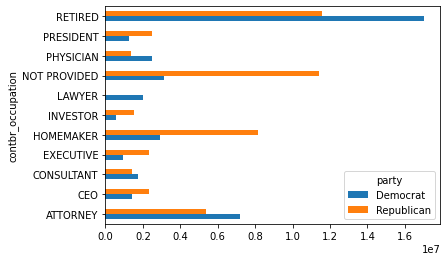

In [210]:
over_2mm.plot(kind='barh')